## Preprocessing

In [87]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [88]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['EIN', 'NAME'])


In [89]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
unique_values = application_df.nunique()
unique_values

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [90]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [91]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
cutoff_value = 500
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: count, dtype: int64

In [92]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [93]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
# Determining the value counts for CLASSIFICATION
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Filtering and displaying the classifications with value counts greater than 1
classification_counts[classification_counts > 1]


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [94]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classification_counts = application_df['CLASSIFICATION'].value_counts()
# Choosing a cutoff value and create a list of classifications to be replaced
cutoff_value = 1000
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: count, dtype: int64

In [95]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df)

In [96]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop(columns=['IS_SUCCESSFUL'])
y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [98]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE


nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Check the structure of the model
nn.summary()

c:\Users\ebehnia\AppData\Local\anaconda3\conda-meta\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 120)            │         5,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,281 (40.16 KB)

 Trainable params: 10,281 (40.16 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7085 - loss: 0.5853 - val_accuracy: 0.7380 - val_loss: 0.5545
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7309 - loss: 0.5533 - val_accuracy: 0.7358 - val_loss: 0.5495
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7260 - loss: 0.5555 - val_accuracy: 0.7376 - val_loss: 0.5472
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7289 - loss: 0.5527 - val_accuracy: 0.7358 - val_loss: 0.5494
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7322 - loss: 0.5494 - val_accuracy: 0.7278 - val_loss: 0.5506
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7341 - loss: 0.5467 - val_accuracy: 0.7394 - val_loss: 0.5443
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7293 - loss: 0.5492 - val_accuracy: 0.7387 - val_loss: 0.5433
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7238 - loss: 0.5496 - val_accu

In [101]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7254 - loss: 0.5616
Loss: 0.5615577101707458, Accuracy: 0.7253644466400146


<Axes: >

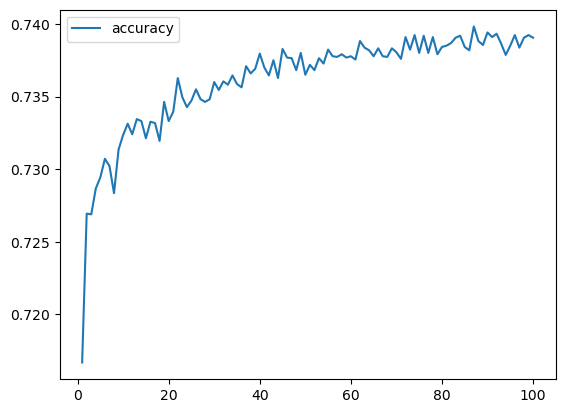

In [102]:
#Graphing the accuracy for visual representation
history_df = pd.DataFrame(history.history, index = range(1, len(history.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [103]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save('AlphabetSoupCharity.hdf5')

### Model Optimization Attempts 

## First attempt: 

Dropping a column that is not beneficial to the prediction 

In [104]:
#application_df = application_df.drop(columns=['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS'])
#application_df

- application_types's cut off = 500 
- classification's cut off = 1000
- First Layer units = 80  | activation: relu
- Second Layer units= 30  | activation: relu
- Third layer units = 1   | activation: sigmoid

Accuracy = 0.0.7260932922363281

Moving to the next attempt since 72% ≠ 75%

## Second attempt: 
- application_types's cut off = 1200 
- classification's cut off = 100
- First Layer units = 45  | activation: relu
- Second Layer units= 25  | activation: relu
- Third layer units = 1   | activation: sigmoid

Accuracy =  0.7227405309677124

Moving onn to the thirs attempt attempt since 72% ≠ %75


## Third attempt: 
- application_types's cut off = 100 
- classification's cut off = 200
- First Layer units = 120  | activation: relu
- Second Layer units= 40  | activation: tanh
- Third layer units = 1   | activation: sigmoid

Accuracy =  0.7253644466400146

No luck! Giving up. 